# Part 1: The method of Gradient Descent

### Goal:
The goal of this project is to solve a system of equations (indirectly) using an alorithm known as gradient descent.

## 1.4 Gradient Descent Project Example

In [6]:
from IPython.display import Image, display
import numpy as np
image_width=700

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


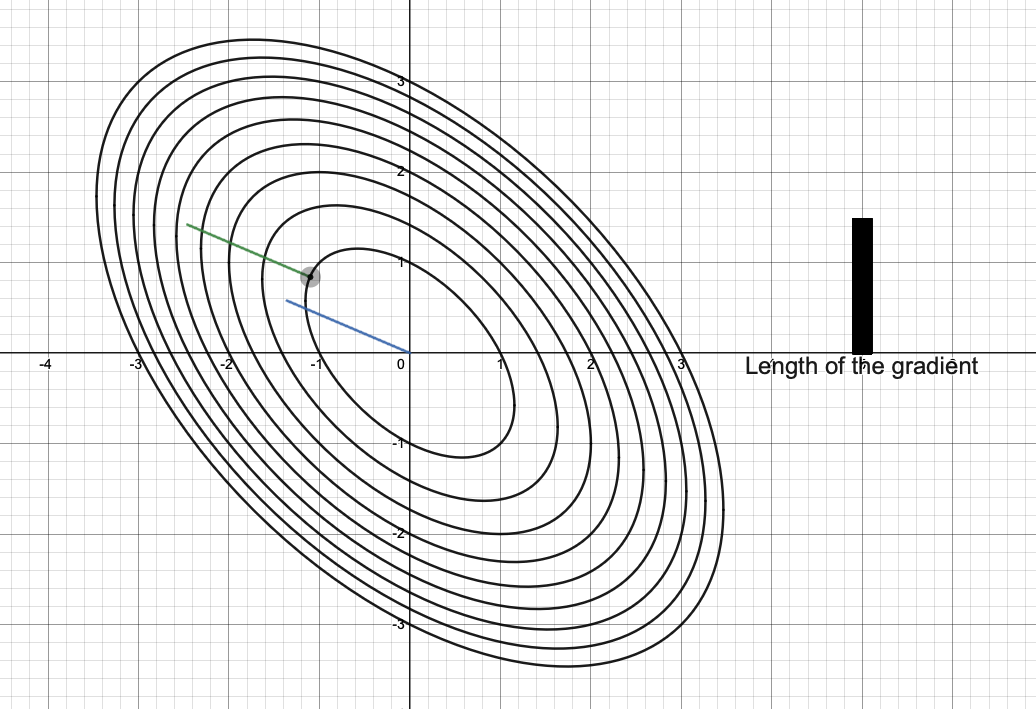

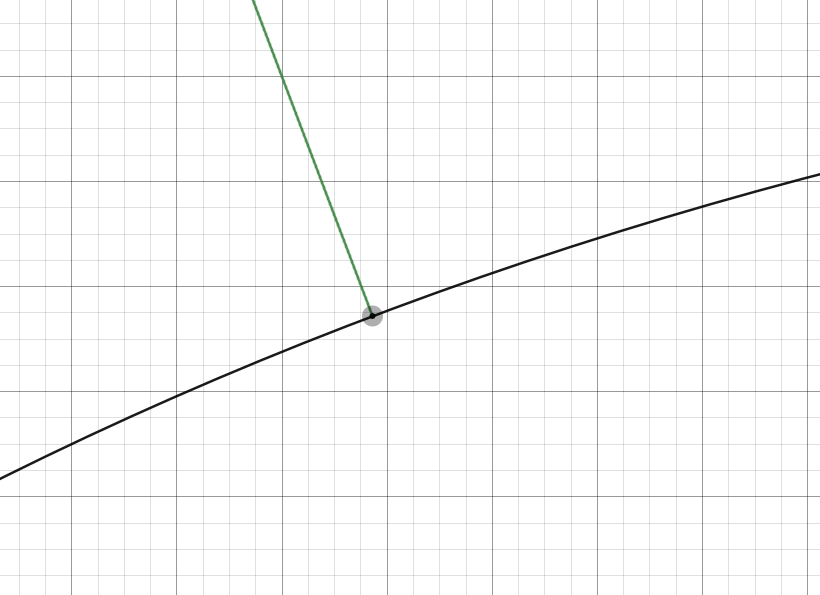

In [2]:
display(Image(filename='screenshots/1.4.1a.png', width=image_width), Image(filename='screenshots/1.4.1b.png', width=image_width))

### 1.4.1 Properties of the gradient

From the [desmos link](https://www.desmos.com/calculator/sduapnehxo), and playing around with two different functions, we see that the gradient is always perpendicular or orthogonal to the level set. After zooming in to where the level set looks flat, we can also see that moving perpendicular to the gradient (either left or the right) will result in no change in surface level i.e. the "altitude" moving along the level set will remain the same.

Since the level sets are constant, the fastest way to change the height of the level set, is to away from the level set in the x-y plane. Moving away from the level set will be moving perpendicular to the level set. As we are given the fact that the gradient is increasing in direction and found that the gradient is perpendicular to the level set, we see that the gradient points in the direction that f(x,y) increases the fastest.

### 1.4.2 Set Up

### Defining the gradient

In section 1.3, Background: Vectors and The Gradient, we are shown how a gradient can be constructed as well as its constraints:

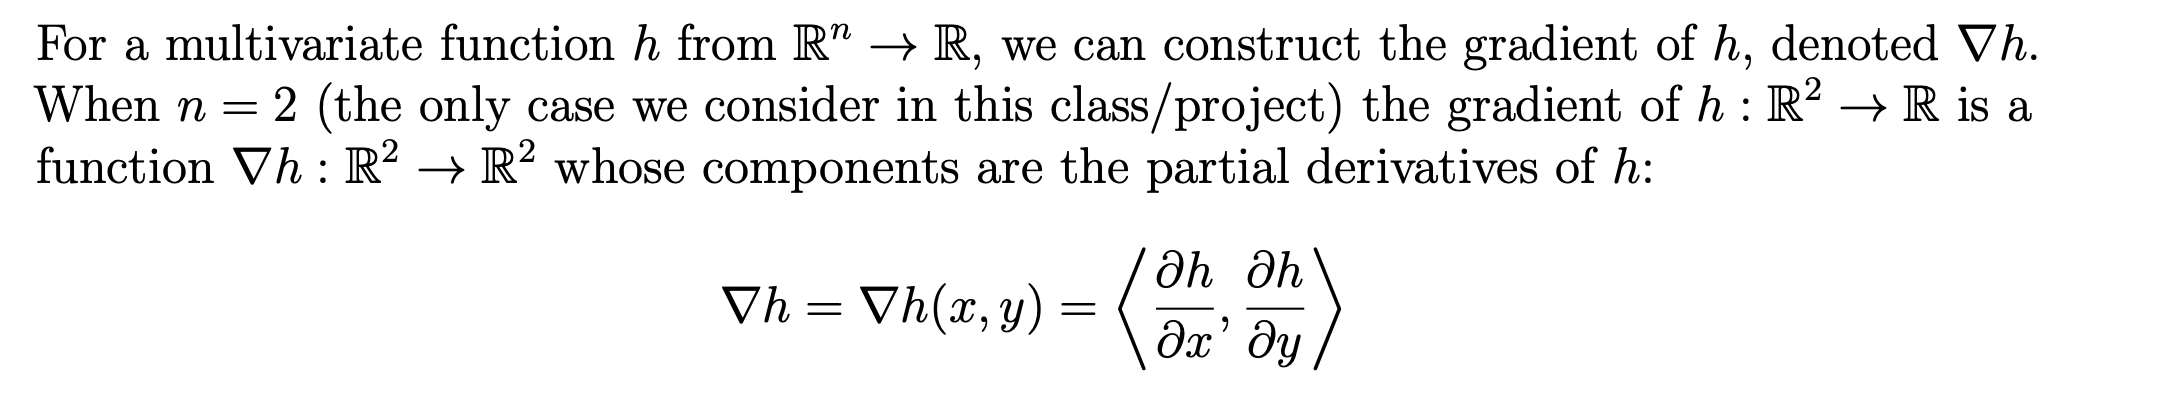

In [3]:
display(Image(filename='screenshots/1.4.2e.png', width=image_width))

In the definition of a gradient, we know that for a multivariate function, its gradient can only be constructed if the output of that function maps to a single value (R^n --> R).

Since we are trying to solve the system of equations in the components of f(x,y) using gradient descent, we want to assess if we can first calculate the gradient of f(x,y).

Section 1.2 outlines f(x,y):

## $$ f(x,y) = <3x+y+1, 2x-y-1> = A\overrightarrow{x}-\overrightarrow{b} $$

In [1]:
#display(Image(filename='screenshots/1.4.2a.png', width=image_width))

For f(x,y), we see that it has two inputs, x and y, and two outputs 3x+y+1 and 2x-y-1 (R^2 --> R^2). In order to get the gradient of f(x,y), its output must map to a single value. Becuase of this, we cannot calculate the gradient of f(x,y) and have to find another function in order to calculate the gradient.

In [4]:
# (v) EXTRA work to build towards calculating L(x,y)
# how can we transform the output of f(x,y) to a single value?

# x and y example inputs for f(x,y)
x, y = 3, 1

# vector of f(3,1)
v = np.array([3*x + y + 1, 2*x - y - 1])
print('Vector of f(3,1)')
print(f'Two Inputs: x={x}, y={y}')
print(f'Two Outputs: {v}')

print('--- '*6)

# length of vector
length_vector = np.sqrt(v[0]**2 + v[1]**2)
print('Length of Vector')
print(f'Two Inputs: x={x}, y={y}')
print(f'One Output: Length of Vector={length_vector}')

Vector of f(3,1)
Two Inputs: x=3, y=1
Two Outputs: [11  4]
--- --- --- --- --- --- 
Length of Vector
Two Inputs: x=3, y=1
One Output: Length of Vector=11.704699910719626


### Computing the squared length of f(x,y), L(x,y):
- Below, we calculate the squared length of f(x,y) similar to finding the squared length of a two-component vector as done in the previous example (v).
    - || f(x,y) ||^2 = L(x,y) 
- We simply take the two components of f(x,y), square them, and then take their sum
- Here, L(x,y) maps the two inputs of the x and y components to a single output




### Squared length of f(x,y):
### $$ ||f(x,y)||^2 = L(x,y) $$
### $$ f(x,y) = <3x+y+1, 2x-y-1> $$
### $$ L(x,y) = (3x+y+1)^2 + (2x-y-1)^2$$

In [2]:
#display(Image(filename='screenshots/1.4.2b.jpeg', width=image_width))

In [6]:
# (vii) - using the computed squared length of f(x,y)

# x and y inputs for f(x,y)
x, y = 3, 1

# squared length of f(x,y) = ||f(x,y)||^2 = L
L = (3*x + y + 1)**2 + (2*x-y-1)**2

# square root of L should match vector length of (v)
print('Squared Length')
print(f'Two Inputs: x={x}, y={y}')
print(f'One Output: Length of Vector={L}')

print('---'*6)
print(f'Square root of L(x,y): {np.sqrt(L)}')

Squared Length
Two Inputs: x=3, y=1
One Output: Length of Vector=137
------------------
Square root of L(x,y): 11.704699910719626


In the cell above, we see that the vector length of f(x,y) at (3,1) is equal to the square root of the calculated square length of f(x,y), L(x,y), at the same point. Calculating L(x,y) maps the two inputs, x and y, to one output, the length squared. This will allow us to calculate the gradient of L(x,y).

To further understand the relationship between f(x,y) and L(x,y) and how they will be used in gradient descent, we can ask ourselves: 

__"What condition is necessary for a vector ⟨a, b⟩ to have zero length?""__

In order for the vector \<a, b> to have a zero length, a and b must be zero. So if the vector's length is 0, its components, a and b, must also be zero.

In the context of f(x,y), the two component equations...
1. 3x + y + 1
2. 2x - y - 1

...must both be equal to zero in order for their their vector length to also be zero. This means that to find the solution to f(x,y) where f(x,y) = 0, its squared length, L(x,y) must also be equal to zero.

With this relationship in mind, we can use L(x,y) to calculate the gradient.

### Computing the gradient of L(x,y) 

- In order to compute the gradient of L(x,y), L(x,y) itself must first map two inputs to one output which we have just shown.
- The next important step is to recognize that the gradient of L(x,y) will map two inputs to two outputs whose components are partial derivatives of L(x,y) which we went over in the defintion of a gradient
- In the work below, we calculate the partial derivatives, dL/dL(x) and dL/dL(y), which make up the components of the gradient of L(x,y)

### $$ \nabla ||f(x,y)||^2 = \nabla L(x,y) =  <\frac{dL}{dx}, \frac{dL}{dy}> $$
### $$ L(x,y) = (3x+y+1)^2 + (2x-y-1)^2 $$
#### $$ \frac{dL}{dx} = 6(3x+y+1) + 4(2x-y-1) $$
#### $$       = 26x+2y+2 = 2(13x+y+1) $$
#### $$ \frac{dL}{dy} = 2(3x+y+1) + 2(2x-y-1) $$
#### $$       = 4y+2x+4 = 2(x+2y+2) $$
### $$ \nabla L(x,y) = <2(13x+y+1), 2(x+2y+2)> $$

In [11]:
#display(Image(filename='screenshots/1.4.2c.png', width=image_width))

### Gradient of L(x,y) vs Matrix Multiplication of A^T(Ax-b)
- From the gradient of L(x,y) we computed: \<2(13x+y+1), 2(x+2y+2)>
- From the [symbolab link](https://www.symbolab.com/solver/step-by-step/%5Cbegin%7Bpmatrix%7D3%262%5C%5C%20%20%201%26-1%5Cend%7Bpmatrix%7D%5Cleft(%5Cbegin%7Bpmatrix%7D3%261%5C%5C%20%20%20%202%26-1%5Cend%7Bpmatrix%7D%5Cbegin%7Bpmatrix%7Dx%5C%5C%20%20%20%20y%5Cend%7Bpmatrix%7D-%5Cbegin%7Bpmatrix%7D-1%5C%5C%20%20%201%5Cend%7Bpmatrix%7D%5Cright)?or=input) where A^T(Ax-b) was calculated, the result was:
    - [(13x+y+1)],[(x+2y+2)]] 
    - this is a 2x1 matrix
- Based on these two observations, the gradient of the squared length of (Ax-b) is \<(13x+y+1), (x+2y+2)> as shown below:

$$ A^T\left[ \left( \begin{matrix}
3 & 1  \\
2 & -1
\end{matrix} \right) \left( \begin{matrix}
x  \\
y
\end{matrix} \right) - \left( \begin{matrix}
-1  \\
1
\end{matrix} \right)\right] = \begin{pmatrix}
13x+y+1 \\
x+2y+2
\end{pmatrix}$$

My guess for the general matrix formula for the gradient: 

#### $$ ||A\overrightarrow{x}-\overrightarrow{b}||^2 = \begin{pmatrix}
13x+y+1 \\
x+2y+2
\end{pmatrix} $$

In [12]:
#display(Image(filename='screenshots/1.4.2d.png', width=image_width))

## 1.4.3 Investigating the method of Gradient Descent

The equation below is the general formula for a gradient descent function, g(x,y) where g maps two inputs to one output (R^2 --> R).

The 2x1 vector, a_n, is the initial location of the points, x_0 and y_0. The coefficient, eta, is the "step size" by which to control how much of the gradient to subtract. The 2x1 vector, an_1, is the set of new points calculated after subtracting the gradient function multiplied by eta.

# $$ \overrightarrow{a}_{n+1} = \overrightarrow{a}_{n}-\eta \nabla g(\overrightarrow{a}_{n}) $$

In [13]:
#display(Image(filename='screenshots/1.4.3a.png', width=image_width-200))

Gradient descent is a step-wise, recursive algorithim. It utilizes the gradient at a certain position in a function to move towards a local minimum of that function. The gradient represents the value that maps the partial derivatives of g(x,y) at a specific point as x/y components. 

As discussed earlier and using f(x,y) as the example, the gradient always points to the direction in which f(x,y) increases the fastest. Therefore, following the direction of the gradient will increase your poisition at the fastest rate relative to a point's current "height" and opposing the gradient (or subtracting the gradient) will decrease a points position at the fastest rate relative to its current "height". The amount of change per step of a point with the gradient can be varied using the coefficient, eta. 

So in gradient descent, you start at inital points of x0 and y0 and then subtract the gradient\*eta (which should take the point closer to a minimum). The algorithm does this over and over, each time setting new points and subtracting the gradient*eta, until you reach a gradient of 0 which equates to reaching a local minimum of f(x,y). In terms of how eta affects the gradient, the size of the eta coefficient can either make the steps to reaching your local minimum too small (if eta is a small value) or too big (if eta is too large) which can lead to over-shooting and not reaching a local minimum. In the two cases where eta is not an optimal value, gradient descent will take longer to reach the local minimum. 

### Brendt's implementation of Gradient Descent

In [10]:
import math
import numpy as np


def vecLength(v):
    tempSum = 0.0
    for x in v:
        tempSum += x[0]**2
    return math.sqrt(tempSum)


def f(A, b, x, y):
    temp = np.matrix([[x], [y]])
    return np.matrix(np.dot(A, temp) - b)

def grad(A, b, x, y):
    vec = np.matrix([[x], [y]])
    return np.matrix(2 * np.dot(np.transpose(A), np.dot(A, vec) - b))

def main():
    gamma = .02
    A = np.matrix([[3, 1], [2, -1]])
    b = np.matrix([[-1], [1]])
    x = 0.5
    y = -0.5
    step = 0
    while vecLength(grad(A, b, x, y)) > 0.0001:
        step += 1
        x = (np.matrix([[x], [y]]) - gamma * grad(A, b, x, y)).item(0)
        y = (np.matrix([[x], [y]]) - gamma * grad(A, b, x, y)).item(1)
        print("At step ", step, ":\n(x,y) = (", '{:10f}'.format(x), ", ", '{:10f}'.format(y), ")")
        print(
            "The magnitude squared (length squared) of the output of f, i.e.,||f(x,y)||^2=L(x,y) at this point is ",
            '{:12f}'.format(vecLength(f(A, b, x, y))**2))
        print("The magnitude (length) of the gradient at step ", step, " is ",
              '{:8f}'.format(vecLength(grad(A, b, x, y))))
        print('\n')
          
main()

At step  1 :
(x,y) = (   0.220000 ,   -0.548800 )
The magnitude squared (length squared) of the output of f, i.e.,||f(x,y)||^2=L(x,y) at this point is      1.234891
The magnitude (length) of the gradient at step  1  is  6.992518


At step  2 :
(x,y) = (   0.087552 ,   -0.588398 )
The magnitude squared (length squared) of the output of f, i.e.,||f(x,y)||^2=L(x,y) at this point is      0.510555
The magnitude (length) of the gradient at step  2  is  3.595157


At step  3 :
(x,y) = (   0.025561 ,   -0.622349 )
The magnitude squared (length squared) of the output of f, i.e.,||f(x,y)||^2=L(x,y) at this point is      0.313041
The magnitude (length) of the gradient at step  3  is  2.110703


At step  4 :
(x,y) = (  -0.002837 ,   -0.652447 )
The magnitude squared (length squared) of the output of f, i.e.,||f(x,y)||^2=L(x,y) at this point is      0.239718
The magnitude (length) of the gradient at step  4  is  1.517569


At step  5 :
(x,y) = (  -0.015264 ,   -0.679641 )
The magnitude squared (len

Based on the code above, the initial (x,y) pair starts at (0.5, -0.5) with a gamma (eta) set at 0.2. At each step, the gradient is calculated, the gamma\*gradient is subtracted from the (x,y) pair, and this process repeats until the gradient is below 0.0001.

At each step of gradient descent, the (x,y) pairs are approaching 0 and -1 respectively while L(x,y) and the gradient of L(x,y) approach 0.

We can check the results of Brendt's implementation of gradient descent by plugging in x=0 and y=-1 into the squared length of f(x,y):

In [11]:
# x and y inputs found from gradient descent
x, y = 0, -1

# squared length of f(x,y) = ||f(x,y)||^2 = L
L = (3*x + y + 1)**2 + (2*x-y-1)**2

# expect squared length to be 0
L

0

As expected, the squared length is in fact 0!

Earlier, we discussed the fact that you cannot take the gradient of f(x,y) since f(x,y) has two outputs while you can take the gradient of L(x,y) since L(x,y) returns a single output. In order to calculate the new points of of a_n with gradient descent, you need to be able to calculate the gradient of the function. For f(x,y), it is not possible to calculate the gradient and therefore, not possible to use gradient descent. The opposite is true for L(x,y) which is why we can calculate the gradient of L(x,y) and can use it in gradient descent.

Remember that the function that we are trying to find the solution for, is f(x,y). To find the solution, f(x,y) must be equal to zero. As stated above, we cannot use f(x,y) directly to calculate the gradient in order to minimize f(x,y). However, the squared length of f(x,y), L(x,y) can be used. If the squared length of of f(x,y) is 0 i.e L(x,y) = 0, then f(x,y) will also equal zero as we outlined earlier in the notebook. Therefore L(x,y) is an alternative function that we can utilize in gradient descent to iteratively arrive to a minimum of f(x,y) in order to find the solution.

So in a sense, L(x,y) represents how far or close f(x,y) is to being equal to zero. That is, the closer L(x,y) is to zero, the closer f(x,y) is to being equal to zero as well, and the closer we get to the solution pair (x,y) for which f(x,y) = 0. 

Again, from the Python code above, we see that x approachs 0 and y approaches -1 with each step of gradient descent. We can plug these values directly into f(x,y) like we did for the squared length of f(x,y) to confirm the results:

In [12]:
# x and y inputs for f(x,y) as calculated by gradient descent
x, y = 0, -1

# vector of f(0,-1)
v = np.array([3*x + y + 1, 2*x - y - 1])

# length of vector expected to be 0
length_vector = np.sqrt(v[0]**2 + v[1]**2)
print(length_vector)

0.0


With the pair (0,-1) found through gradient descent, we get f(0,-1) = 0 thus showing that we arrived at the correct solution pair!

# Part 2: Hardest Question of the year

- I would want to be lower case z (in cursive)
1. It's fun to write
2. It's a pretty letter
3. Even if I rush and write it a little sloppy, 'z' still looks cool haha

# Part 3: Extra Credit

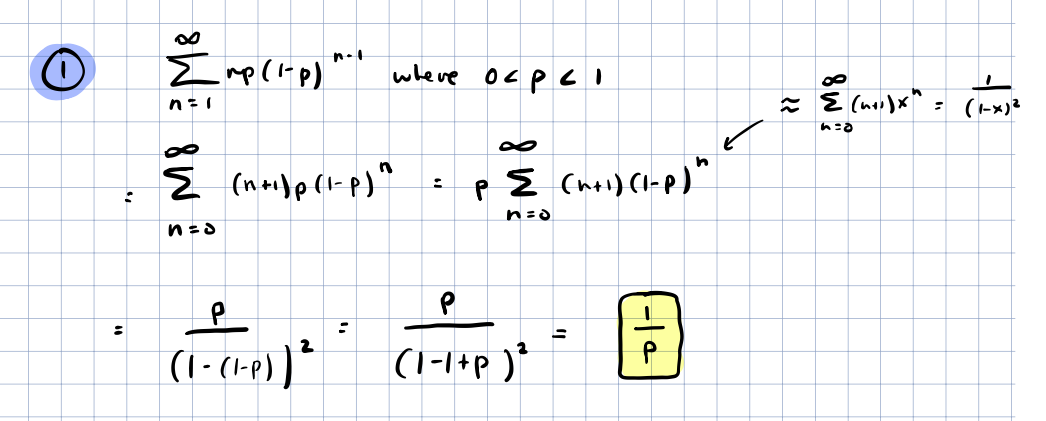

In [13]:
display(Image(filename='screenshots/ec_1.png', width=image_width))

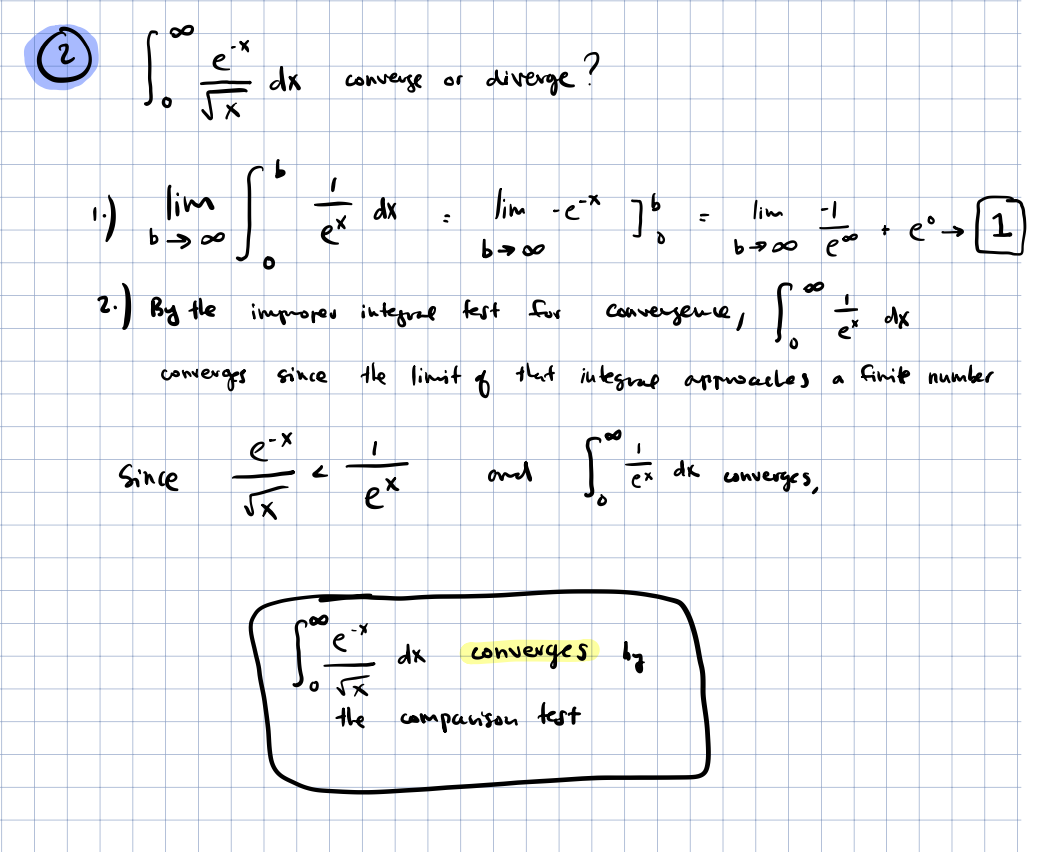

In [14]:
display(Image(filename='screenshots/ec_2.png', width=image_width))

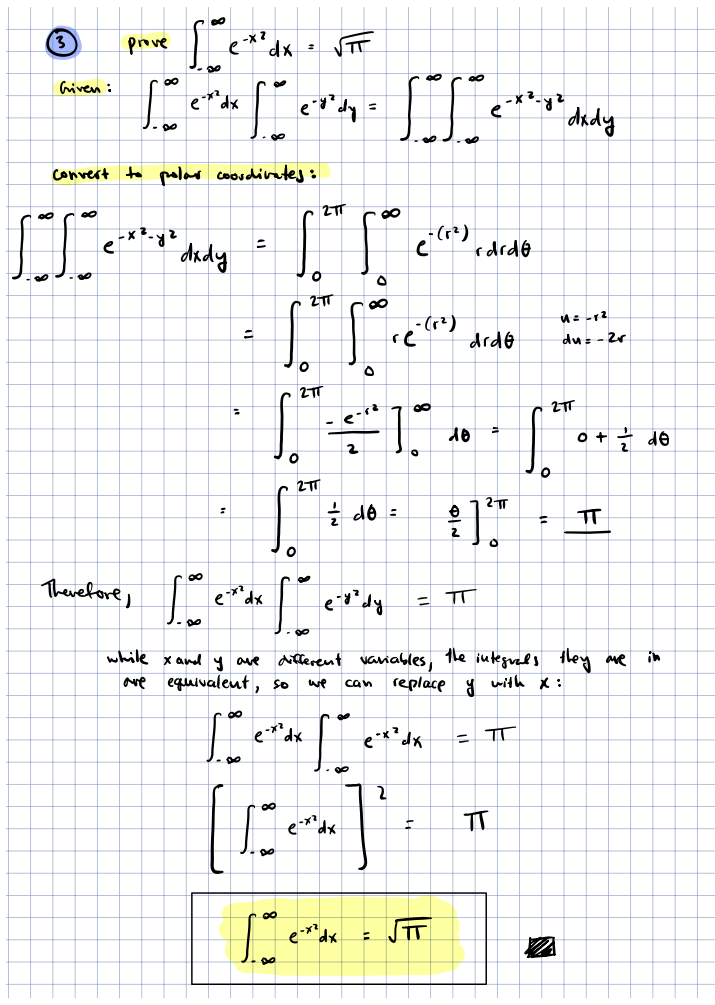

In [15]:
display(Image(filename='screenshots/ec_3.png', width=image_width))